In [1]:
import numpy as np
import pandas as pd
import datetime

file = 'east.csv'

#df = pd.DataFrame((pd.read_csv(file,header=0, delimiter=',')),columns=[float, datetime])

raw_data = pd.read_csv(file,header=0, delimiter=',')
data = np.array(raw_data)


#df = pd.DataFrame(data[:,0:3], columns = ['usage', 'supply','temp'], index=data[:,3], dtype=float)
df = pd.DataFrame(data, columns = ['usage', 'supply','temp','date'])
df['supply'] = df['supply'].apply(pd.to_numeric)
df['usage'] = df['usage'].apply(pd.to_numeric)
df['temp'] = df['temp'].apply(pd.to_numeric)
df['date'] = df['date'].apply(pd.to_datetime)
#df.index = pd.to_datetime(df.index)

df.fillna(0)
#print(df.ix[:, "max_supply"].isnull()) 

print(df)
df.info()

     usage  supply  temp       date
0     41.8    13.6  30.4 2016-10-01
1     41.7    13.5  30.6 2016-10-02
2     46.5    14.0  31.5 2016-10-03
3     47.6    13.8  31.6 2016-10-04
4     46.6    14.8  30.8 2016-10-05
5     44.7    13.4  28.6 2016-10-06
6     43.1    13.9  26.0 2016-10-07
7     44.5    14.2  24.7 2016-10-08
8     43.8    14.1  24.9 2016-10-09
9     44.6    13.9  28.3 2016-10-10
10    45.9    14.1  29.9 2016-10-11
11    46.4    14.2  30.6 2016-10-12
12    45.7    14.1  31.1 2016-10-13
13    45.8    12.4  30.3 2016-10-14
14    47.5    14.1  31.6 2016-10-15
15    46.2    14.4  30.8 2016-10-16
16    47.0    14.3  31.2 2016-10-17
17    48.4    14.2  31.0 2016-10-18
18    46.1    11.4  30.9 2016-10-19
19    43.4    13.3  29.3 2016-10-20
20    44.8    14.4  31.3 2016-10-21
21    46.0    14.2  31.3 2016-10-22
22    45.1    14.2  31.6 2016-10-23
23    45.5    14.3  30.0 2016-10-24
24    45.2    14.6  30.3 2016-10-25
25    45.8    15.8  31.2 2016-10-26
26    46.8    13.9  31.3 201

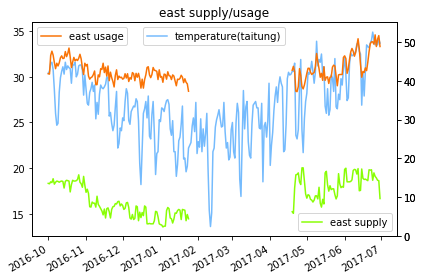

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax1 = plt.subplots()



#time = pd.to_datetime(df['date'])
ax1.plot(df['date'], df['temp'],label="temperature(taitung)",color='xkcd:sky blue')
#plt.setp(line_supply, linewidth=2, color='r') 

line_usage = ax1.twinx()
line_supply = ax1.twinx()

line_usage.plot(df['date'], df['usage'], label="east usage",color='xkcd:orange')
#plt.setp(line_supply, linewidth=2, color='b') 


line_supply.plot(df['date'], df['supply'],label="east supply",color='xkcd:lime green')

#datemin = datetime.date(datetime.min().year, 1, 1)
#datemax = datetime.date(datetime.max().year + 1, 1, 1)
#ax1.set_xlim(datemin, datemax)

plt.xlabel('date')
plt.title('east supply/usage')
plt.setp(line_supply, yticks=[0, 10, 20, 30, 40, 50])
plt.setp(line_usage, yticks=[0, 10, 20, 30, 40, 50])
line_supply.set_ylim(0, 55)
line_usage.set_ylim(0, 55)
#line_supply.yticks([800, 900, 1000, 1100, 1200])
#line_usage.yticks([800, 900, 1000, 1100, 1200])

fig.autofmt_xdate()
ax1.legend(loc="upper center")
line_usage.legend(loc="upper left")
line_supply.legend(loc="lower right")
#plt.legend(loc="best")
fig.tight_layout()
plt.show()
fig.savefig('east.png', dpi=fig.dpi)